### Тема “Обучение без учителя”

#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [3]:
bost = load_boston()

In [4]:
X = pd.DataFrame(bost["data"], columns=bost["feature_names"])
y = pd.DataFrame(bost["target"], columns=["price"])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [6]:
scaler = StandardScaler()

In [7]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [8]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

In [9]:
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


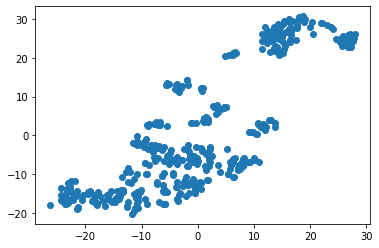

In [10]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [11]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [12]:
train_labels = model.fit_predict(X_train_tsne)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Text(0.5, 1.0, 'Train data')

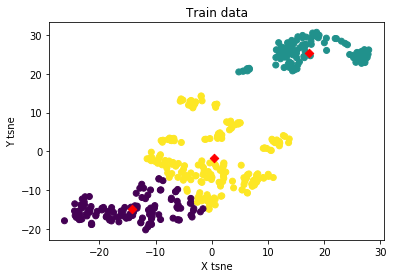

In [13]:
centers = model.cluster_centers_

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlabel('X tsne')
plt.ylabel('Y tsne')
# plt.legend(train_labels)

plt.title('Train data')

Вычислите средние значения price и CRIM в разных кластерах.

In [22]:
print('Average Price&CRIM in   general:\t{}'.format(y_train['price'].mean()), X_train['CRIM'].mean())
print('Average Price&CRIM in 0 cluster:\t{}'.format(y_train['price'][train_labels == 0].mean()), X_train['CRIM'][train_labels == 0].mean())
print('Average Price&CRIM in 1 cluster:\t{}'.format(y_train['price'][train_labels == 1].mean()), X_train['CRIM'][train_labels == 1].mean())
print('Average Price&CRIM in 2 cluster:\t{}'.format(y_train['price'][train_labels == 2].mean()), X_train['CRIM'][train_labels == 2].mean())

Average Price&CRIM in   general:	22.79653465346535 3.609124628712873
Average Price&CRIM in 0 cluster:	25.99304347826087 0.08557826086956521
Average Price&CRIM in 1 cluster:	16.277227722772285 13.17982178217822
Average Price&CRIM in 2 cluster:	24.343617021276597 0.6227811170212766


> в чем же измеряется эта криминальность?)

#### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

In [23]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_test_tsne = tsne.fit_transform(X_test_scaled)
test_labels = model.fit_predict(X_test_tsne)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных

In [24]:
print('Average Price&CRIM in   general:\t{}'.format(y_test['price'].mean()), X_test['CRIM'].mean())
print('Average Price&CRIM in 0 cluster:\t{}'.format(y_test['price'][test_labels == 0].mean()), X_test['CRIM'][test_labels == 0].mean())
print('Average Price&CRIM in 1 cluster:\t{}'.format(y_test['price'][test_labels == 1].mean()), X_test['CRIM'][test_labels == 1].mean())
print('Average Price&CRIM in 2 cluster:\t{}'.format(y_test['price'][test_labels == 2].mean()), X_test['CRIM'][test_labels == 2].mean())

Average Price&CRIM in   general:	21.488235294117654 3.630946764705883
Average Price&CRIM in 0 cluster:	20.451724137931034 0.41028551724137924
Average Price&CRIM in 1 cluster:	16.349999999999998 10.401306176470587
Average Price&CRIM in 2 cluster:	26.738461538461536 0.12343282051282049


> теперь понятно зачем нужна CV)